## Método de Ondas Planas

Programa para calcular la estructura de bandas de un cristal
Fotónico 1D por medio del método de ondas planas PWE  
Referencia: Photonics Crystals, Physics and practical modeling  
Igor A. Sukhoivanov and Igor V. Guryev

In [77]:
import numpy as np
import matplotlib.pyplot as plt

l1 = 0.5e-6
l2 = 0.5e-6

eps1 = 1
eps2 = 1

a = l1+l2
numG = 100

G  = np.arange(-numG* 2 * np.pi/a, numG * 2* np.pi/a, 2* np.pi/a)
G1 = np.arange(-numG* 2 * np.pi/a, numG * 2* np.pi/a, 2* np.pi/a)
chi = np.zeros((len(G),len(G1)),dtype = 'complex_')

for i in range(len(G)):
    for J in range(len(G1)):
        if(G[i] - G1[J]) == 0:
            chi[i,J] = 1/(l1+l2) * (1/eps1 * l1 + 1/eps2*l2)
        else:
            chi[i,J] = 1j /(l1+l2)/(G[i]-G1[J]) * (1/eps1 * np.exp(-1j * (G[i]-G1[J]) * l1) - 1) + 1/eps2 * (np.exp(-1j * (G[i]-G1[J]) * (l1+l2)) - np.exp(-1j * (G[i]-G1[J])*l1))


In [78]:
print(chi)
print(chi.shape)

[[ 1.00000000e+00+0.00000000e+00j  2.00000000e+00+3.18309886e-01j
  -1.29171273e-15-1.62321409e-14j ...  2.00000000e+00+1.61578622e-03j
  -1.35025493e-15-1.67981258e-12j  2.00000000e+00+1.59954716e-03j]
 [ 2.00000000e+00-3.18309886e-01j  1.00000000e+00+0.00000000e+00j
   2.00000000e+00+3.18309886e-01j ... -1.34652501e-15-1.65825137e-12j
   2.00000000e+00+1.61578622e-03j -1.25887199e-15-1.56612574e-12j]
 [-1.29171273e-15+1.62321409e-14j  2.00000000e+00-3.18309886e-01j
   1.00000000e+00+0.00000000e+00j ...  2.00000000e+00+1.63235839e-03j
  -1.34652501e-15-1.65825137e-12j  2.00000000e+00+1.61578622e-03j]
 ...
 [ 2.00000000e+00-1.61578622e-03j -1.34652501e-15+1.65825137e-12j
   2.00000000e+00-1.63235839e-03j ...  1.00000000e+00+0.00000000e+00j
   2.00000000e+00+3.18309886e-01j  8.17927232e-15+1.02783767e-13j]
 [-1.35025493e-15+1.67981258e-12j  2.00000000e+00-1.61578622e-03j
  -1.34652501e-15+1.65825137e-12j ...  2.00000000e+00-3.18309886e-01j
   1.00000000e+00+0.00000000e+00j  2.00000000e+

In [79]:
M = np.zeros((len(G),len(G1)),dtype = 'complex_')
ks = np.linspace(-2*np.pi/a, 2*np.pi/a,100)
Ks = list()
dispe = list()


In [80]:
for k in range(len(ks)):
    for i in range(len(G)):
        for j in range(len(G1)):
            M[j,i] = chi[j,i] * (ks[k] + G1[j]) * (ks[k] + G[i])
    V = np.linalg.eig(M)[0]
    dispe.append(np.sqrt(np.sort(np.abs(V))) * a/2/np.pi)
    Ks.append(ks[k] * a/np.pi)




In [81]:
print(dispe[0])

[1.85404434e-07 8.49492190e-01 9.58815165e-01 1.72495511e+00
 1.88124738e+00 2.64583915e+00 2.75789100e+00 3.60516500e+00
 3.60683392e+00 4.45421428e+00 4.56672107e+00 5.32736392e+00
 5.49120303e+00 6.24846878e+00 6.36683752e+00 7.21196746e+00
 7.21234498e+00 8.05555493e+00 8.17875295e+00 8.92637386e+00
 9.10440638e+00 9.85056267e+00 9.97595039e+00 1.08153145e+01
 1.08220754e+01 1.16531537e+01 1.17953749e+01 1.25227884e+01
 1.27197927e+01 1.34537959e+01 1.35838575e+01 1.44149365e+01
 1.44367510e+01 1.52471282e+01 1.54164628e+01 1.61176950e+01
 1.63360119e+01 1.70599612e+01 1.71891555e+01 1.80108054e+01
 1.80570248e+01 1.88378210e+01 1.90414168e+01 1.97125207e+01
 1.99512737e+01 2.06708536e+01 2.07909709e+01 2.16027344e+01
 2.16834846e+01 2.24259690e+01 2.26688699e+01 2.33089589e+01
 2.35640443e+01 2.42881029e+01 2.43886058e+01 2.51910841e+01
 2.53160464e+01 2.60124211e+01 2.62971550e+01 2.69090243e+01
 2.71727657e+01 2.79129422e+01 2.79821012e+01 2.87762219e+01
 2.89542079e+01 2.959837

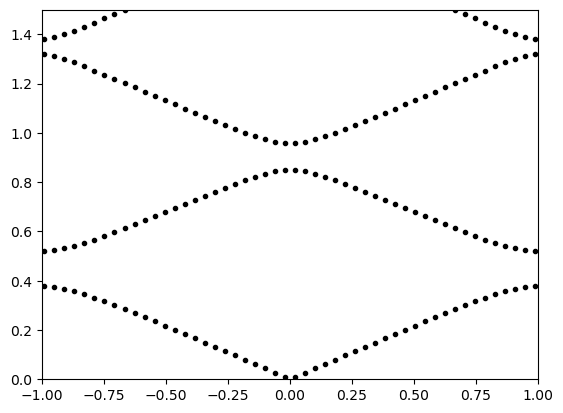

In [82]:
import matplotlib.pyplot as plt

for i in range(len(Ks)):
    plt.plot([Ks[i]] * len(dispe[i]), dispe[i],'.',color='black')
    plt.xlim([-1,1])
    plt.ylim([0,1.5])

## Campo Eléctrico

In [83]:
def Field(x):
    global a, numG, k, Vs, in1
    H = 0
    countt = 0
    for G in np.arange(-numG * 2 * np.pi / a, numG * 2 * np.pi / a + 0.0001, 2 * np.pi / a):
        countt += 1
        H += Vs[countt - 1, in1] * np.exp(1j * (k + G) * x)
    return H

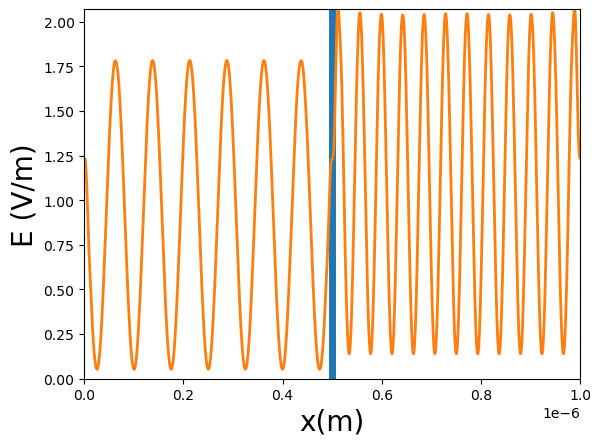

In [84]:
from scipy.linalg import eigh

def calculate_field(x, a, numG, k, Vs, in1):
    H = 0
    countt = 0
    for G in np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a):
        countt += 1
        H += Vs[countt,in1]*np.exp(1j*(k+G)*x)
    return H

k = np.pi/(15*a)
in1 = 20

countG1 = 1
countG = 1
M1 = np.zeros((2*numG+1, 2*numG+1), dtype=complex)

for G in np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a):
    for G1 in np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a):
        M1[countG1-1,countG-1] = chi[countG1-1,countG-1]*(k+G1)*(k+G)
        countG += 1
    countG1 += 1
    countG = 1

countG1 = 1

eigvals, eigvecs = eigh(M1)
ind = np.argsort(eigvals)
Ds = eigvals[ind]
Vs = eigvecs[:,ind]

freq = np.sqrt(abs(Ds[in1-1]))*a/2/np.pi

div = 15
div1 = 1500
x = np.linspace(0, a, div1+1)
FieldE = np.abs(calculate_field(x, a, numG, k, Vs, in1))**2

alt = np.max(np.abs(FieldE))
x1 = np.linspace(0, alt, div+1)
y1 = l1*np.ones(div+1)

plt.figure(2)
plt.plot(y1, x1, linewidth=5)
plt.plot(x, FieldE, linewidth=2)
plt.xlabel('x(m)', fontsize=20)
plt.ylabel('E (V/m)', fontsize=20)
plt.ylim([0, alt])
plt.xlim([0, a])
plt.show()
